In [3]:
# bank account system

class Account:
    
    counter =0
    def __init__(self, openingBal=0):
        Account.counter +=1 #increment counter when account is created
        self.id = Account.counter
        self.bal = openingBal
        
a1 = Account(100)
print(a1.id, a1.bal)
a2 = Account()
print(a2.id, a2.bal)

1 100
2 0


In [4]:

class Account:
    
    counter =0
    def __init__(self, openingBal=0):
        Account.counter +=1 #increment counter when account is created
        self.id = Account.counter
        self.bal = openingBal
        
    def __str__(self):
        return "Account: {} has INR {}".format(self.id, self.bal)

In [5]:
a1 = Account(1000)
print(a1) 

Account: 1 has INR 1000


In [23]:
class Account:
    
    counter =0
    def __init__(self, openingBal=0):
        Account.counter +=1 #increment counter when account is created
        self.id = Account.counter
        self.bal = openingBal
        self.passbook = []
        
    def deposit(self, amount):
        if amount >0:
            self.bal += amount
            self.passbook.append(("Credited", amount)) #tuple to avoid mutabilty
        
    def withdraw(self, amount):
        if self.bal >= amount:
            self.bal -=amount
            self.passbook.append(("Debited", amount)) #tuple to avoid mutabilty
        else:
            print("Insufficient balance")
        
    def __str__(self):
        return "Account: {} has INR {}".format(self.id, self.bal)

In [30]:
a1 = Account(1000)
a1.deposit(100)

In [31]:
print(a1)

Account: 2 has INR 1100


In [32]:
a1.passbook

[('Credited', 100)]

In [33]:
a1.withdraw(1500)
print(a1)

Insufficient balance
Account: 2 has INR 1100


In [22]:
a1.passbook

[('Credited', 100), ('Debited', 500)]

In [38]:
class Account:
    
    counter =0
    def __init__(self, openingBal=0):
        Account.counter +=1 #increment counter when account is created
        self.id = Account.counter
        self.bal = openingBal
        self.passbook = []
        self.numTrans = 0
        self.maxTrans = 2
        
    def deposit(self, amount):
        if amount >0 and self.numTrans < self.maxTrans:
            self.bal += amount
            self.passbook.append(("Credited", amount)) #tuple to avoid mutabilty
            self.numTrans +=1                          #update after each transaction
            
        if self.numTrans >=self.maxTrans:
            print("Max. transaction limit reached")
        
    def withdraw(self, amount):
        if self.bal >= amount and amount >0 and self.numTrans <=self.maxTrans:
            self.bal -=amount
            self.passbook.append(("Debited", amount)) #tuple to avoid mutabilty
        else:
            print("Insufficient balance")
        
    def __str__(self):
        return "Account: {} has INR {}".format(self.id, self.bal)
    
class SavingsAcc(Account):
    
    def __init__(self):  # __init__ will override parent __init__
        self.numTrans = 0

class CurrentAcc(Account):
    pass


In [39]:
sa1 = SavingsAcc(100)
print(sa1)
# init in child class not expecting positonal argument

TypeError: __init__() takes 1 positional argument but 2 were given

In [61]:
class Account:
    
    counter =0
    def __init__(self, openingBal=0):
        Account.counter +=1 #increment counter when account is created
        self.id = Account.counter
        self.__bal = openingBal  #PRIVATE
        self.passbook = []
        self.numTrans = 0
        self.maxTrans = 2
        
    def deposit(self, amount):
        if amount >0 and self.numTrans < self.maxTrans:
            self.__bal += amount
            self.passbook.append(("Credited", amount)) #tuple to avoid mutabilty
            self.numTrans +=1                          #update after each transaction
            
        if self.numTrans >=self.maxTrans:
            print("Max. transaction limit reached")
        
    def withdraw(self, amount):
        if self.__bal >= amount and amount >0 and self.numTrans <=self.maxTrans:
            self.__bal -=amount
            self.passbook.append(("Debited", amount)) #tuple to avoid mutabilty
        else:
            print("Insufficient balance")
        
    def __str__(self):
        return "Account: {} has INR {}".format(self.id, self.__bal)
    
class SavingsAcc(Account):
    
    def __init__(self, openingBal=0):  # __init__ will override parent __init__
        super().__init__(openingBal) #exceute the parent init
        self.numTrans = 0

class CurrentAcc(Account):
     
    def __init__(self,openingBal=0):
        super().__init__(openingBal)
        self.maxTrans = 5


In [62]:
sa1 = SavingsAcc(200)
print(sa1)

Account: 1 has INR 200


In [53]:
sa1.id, sa1.passbook, sa1.numTrans, sa1.maxTrans

(1, [], 0, 2)

In [54]:
ca1 = CurrentAcc()
print(ca1)

Account: 2 has INR 0


In [55]:
ca1.id, ca1.passbook, ca1.numTrans, ca1.maxTrans

(2, [], 0, 5)

In [64]:
sa1.__bal = 10000393383
sa1.__bal

10000393383

In [65]:
sa1.__dict__

{'id': 1,
 '_Account__bal': 200,
 'passbook': [],
 'numTrans': 0,
 'maxTrans': 2,
 '__bal': 10000393383}

## Polymorphism
    - It allows to perform the same action in many different ways

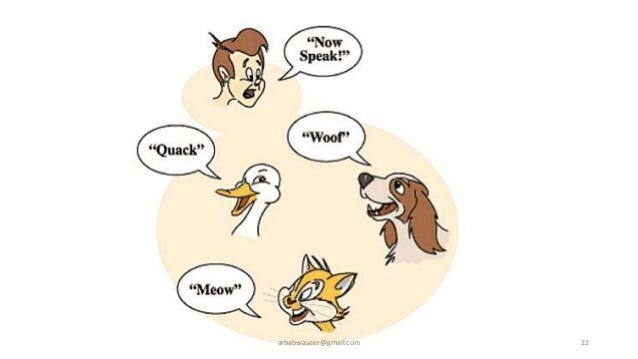

In [66]:
class Account:
    
    counter =0
    def __init__(self, openingBal=0):
        Account.counter +=1 #increment counter when account is created
        self.id = Account.counter
        self.__bal = openingBal  #PRIVATE
        self.passbook = []
        self.numTrans = 0
        self.maxTrans = 2
        
    def deposit(self, amount):
        if amount >0 and self.numTrans < self.maxTrans:
            self.__bal += amount
            self.passbook.append(("Credited", amount)) #tuple to avoid mutabilty
            self.numTrans +=1                          #update after each transaction
            
        if self.numTrans >=self.maxTrans:
            print("Max. transaction limit reached")
        
    def withdraw(self, amount):
        if self.__bal >= amount and amount >0 and self.numTrans <=self.maxTrans:
            self.__bal -=amount
            self.passbook.append(("Debited", amount)) #tuple to avoid mutabilty
        else:
            print("Insufficient balance")
        
    def __str__(self):
        return "Account: {} has INR {}".format(self.id, self.__bal)
    
class SavingsAcc(Account):
    
    def __init__(self, openingBal=0):  # __init__ will override parent __init__
        super().__init__(openingBal) #exceute the parent init
        self.numTrans = 0
        
    def get_interest(self):
        interest = self.__bal*0.05
        print(interest)

class CurrentAcc(Account):
     
    def __init__(self,openingBal=0):
        super().__init__(openingBal)
        self.maxTrans = 5               # CURRENT ACC SPECIFIC MAC NO. OF TRANSACTIONS
        
    def get_interest(self):             # SAME METHOD DIFFERENT ACTION: POLYMORPHISM
        interest = self.__bal*0.01
        print(interest)

In [67]:
sa1 = SavingsAcc(1000)
print(sa1)

Account: 1 has INR 1000


In [68]:
sa1.get_interest()  # private __bal not acessible by child class

AttributeError: 'SavingsAcc' object has no attribute '_SavingsAcc__bal'